# Stanford Open Policing dataset: Analysis of data from Rhode Island

The dataset and related information can be found [here](https://openpolicing.stanford.edu).

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read data into pandas dataframe

In [2]:
ri = pd.read_csv('ri_statewide_2019_02_25.csv')

/Users/christopher/anaconda3/envs/data_test/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Check the names of columns

In [3]:
ri.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make',
       'vehicle_model'],
      dtype='object')

Investigate missing values

In [4]:
ri.isnull().sum()

raw_row_number             0
date                      10
time                      10
zone                      10
subject_race           29073
subject_sex            29097
department_id             10
type                       0
arrest_made            29073
citation_issued        29073
warning_issued         29073
outcome                35841
contraband_found      491919
contraband_drugs      493693
contraband_weapons    497886
contraband_alcohol    508464
contraband_other           0
frisk_performed           10
search_conducted          10
search_basis          491919
reason_for_search     491919
reason_for_stop        29073
vehicle_make          191564
vehicle_model         279593
dtype: int64

Check the shape of the dataframe

In [5]:
ri.shape

(509681, 24)

In [6]:
ri.head(3)

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_make,vehicle_model
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN


Drop all rows that are missing values in the subject_sex column

In [7]:
ri.dropna(subset=['subject_sex'], inplace=True) 

In [8]:
ri.shape

(480584, 24)

Investigate arrest_made column. 

In [9]:
ri.arrest_made.head()

0    False
1    False
2    False
3    False
4    False
Name: arrest_made, dtype: object

Covert arrest_made data type to boolean

In [10]:
ri['arrest_made'] = ri.arrest_made.astype(bool)

### Create datetime index

In [11]:
combined = ri.date.str.cat(ri.time, sep=' ')

In [12]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [13]:
ri.set_index('stop_datetime', inplace=True)

In [14]:
ri.index

DatetimeIndex(['2005-11-22 11:15:00', '2005-10-01 12:20:00',
               '2005-10-01 12:30:00', '2005-10-01 12:50:00',
               '2005-10-01 13:10:00', '2005-10-01 15:50:00',
               '2005-09-11 11:45:00', '2005-09-11 11:45:00',
               '2005-10-04 11:55:00', '2005-10-04 11:55:00',
               ...
               '2015-12-29 13:28:00', '2015-12-27 12:45:00',
               '2015-12-27 13:43:00', '2015-12-28 02:29:00',
               '2015-12-30 11:42:00', '2015-08-16 13:37:00',
               '2015-08-04 10:40:00', '2015-12-20 11:17:00',
               '2015-11-09 23:35:00', '2015-10-30 11:09:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

### Comparing violations by gender

In [15]:
female = ri[ri.subject_sex == 'female']

In [16]:
male = ri[ri.subject_sex == 'male']

Compute the violations by sex as proportions

In [17]:
female.reason_for_stop.value_counts(normalize=True) * 100

Speeding                            65.730757
Other Traffic Violation             13.658131
Equipment/Inspection Violation      10.705516
Registration Violation               4.307676
Seatbelt Violation                   2.707072
Call for Service                     1.805731
Special Detail/Directed Patrol       0.507099
Motorist Assist/Courtesy             0.253168
Violation of City/Town Ordinance     0.164712
APB                                  0.083119
Suspicious Person                    0.056429
Warrant                              0.020589
Name: reason_for_stop, dtype: float64

In [18]:
male.reason_for_stop.value_counts(normalize=True) * 100

Speeding                            52.236397
Other Traffic Violation             20.694757
Equipment/Inspection Violation      13.510242
Registration Violation               4.058138
Special Detail/Directed Patrol       3.713592
Seatbelt Violation                   3.655500
Call for Service                     1.498658
Violation of City/Town Ordinance     0.234657
Motorist Assist/Courtesy             0.188012
APB                                  0.107599
Suspicious Person                    0.076693
Warrant                              0.025755
Name: reason_for_stop, dtype: float64

### Does gender determine whether you get a ticket fo speeding?

In [19]:
female_speeding = ri[(ri.subject_sex == 'female') & (ri.reason_for_stop == 'Speeding')]

In [20]:
male_speeding = ri[(ri.subject_sex == 'male') & (ri.reason_for_stop == 'Speeding')]

In [21]:
male_speeding[['arrest_made', "citation_issued"]].mean()

arrest_made        0.017032
citation_issued    0.944636
dtype: float64

In [22]:
female_speeding[['arrest_made', "citation_issued"]].mean()

arrest_made        0.006323
citation_issued    0.953247
dtype: float64

The data points to the more arrests being made among men. Causation can not be determined

### Does gender affect whose vehicle is searched?


In [23]:
ri.search_conducted.dtypes

dtype('O')

In [24]:
ri['search_conducted'] = ri.search_conducted.astype(bool, inplace=True)

In [25]:
ri[ri.subject_sex == 'female'].search_conducted.mean()

0.018751239152648355

In [26]:
ri[ri.subject_sex == 'male'].search_conducted.mean()

0.04379217389811301

In [27]:
ri.groupby(['subject_sex', 'reason_for_stop' ]).search_conducted.mean()

subject_sex  reason_for_stop                 
female       APB                                 0.165138
             Call for Service                    0.042230
             Equipment/Inspection Violation      0.040245
             Motorist Assist/Courtesy            0.033133
             Other Traffic Violation             0.038021
             Registration Violation              0.054700
             Seatbelt Violation                  0.017746
             Special Detail/Directed Patrol      0.018045
             Speeding                            0.007738
             Suspicious Person                   0.216216
             Violation of City/Town Ordinance    0.060185
             Warrant                             0.148148
male         APB                                 0.255319
             Call for Service                    0.092419
             Equipment/Inspection Violation      0.070916
             Motorist Assist/Courtesy            0.089802
             Other Traffic

### Does gender affect who is frisked during a search?


In [28]:
ri.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make',
       'vehicle_model'],
      dtype='object')

In [29]:
ri.reason_for_search.value_counts().head()

Incident to Arrest       6998
Probable Cause           2063
Odor of Drugs/Alcohol    1872
Reasonable Suspicion     1141
Inventory/Tow            1101
Name: reason_for_search, dtype: int64

Create a boolean series to determine number of frisks

In [30]:
ri['frisk'] = ri.reason_for_search.str.contains('Terry Frisk', na=False)

In [31]:
ri.frisk.sum()

1598

Create a DataFrame of stops in which a search was conducted

In [32]:
searched = ri[ri.search_conducted == True]

Calculate overall frisk rate

In [33]:
searched.frisk.mean()

0.08996734601959239

In [34]:
searched.groupby('subject_sex').frisk.mean()

subject_sex
female    0.066694
male      0.093707
Name: frisk, dtype: float64

### Calculating the hourly arrest rate

In [37]:
ri.arrest_made.mean()

0.03454755048024903

In [39]:
hourly_arrest_rate = ri.groupby(ri.index.hour).arrest_made.mean()

Text(0.5, 1.0, 'Arrest Rate by Time of Day')

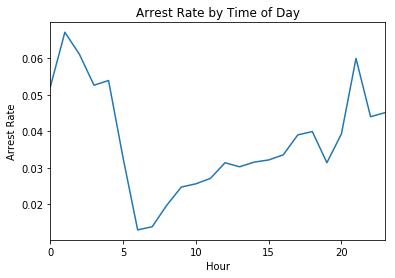

In [44]:
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

### Are drug-related stops on the rise?
